# Step 1

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

In [3]:
# Reading the Uber file

# path = '../input/uber-supplydemand-gap/'

file = 'Uber Request Data.csv'
uber = pd.read_csv(file)

In [4]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0000,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0000,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0000,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0000,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0000,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
# Dimensions of df

uber.shape

(6745, 6)

In [6]:
# Data description

uber.describe()

,Request id,Driver id
count,6745.0000,4095.0000
mean,3384.6449,149.5013
std,1955.0997,86.0520
min,1.0000,1.0000
25%,1691.0000,75.0000
50%,3387.0000,149.0000
75%,5080.0000,224.0000
max,6766.0000,300.0000


In [7]:
# Data info

uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


# Step 2: Data Cleansing and Preparation

In [8]:
# check if any duplicates record exists

sum(uber.duplicated(subset = "Request id")) == 0

True

In [9]:
# Calculating the Missing Values % contribution in DF

df_null = uber.isna().mean().round(4)*100

df_null.sort_values(ascending=False)

Drop timestamp      58.0300
Driver id           39.2900
Request id          0.0000 
Pickup point        0.0000 
Status              0.0000 
Request timestamp   0.0000 
dtype: float64

Inference:

More than 50% of Drop time is null because of Cancelled Trips which makes sense.


Around 40% of Driver Id is null because of Cancelled Trips which makes sense.



In [10]:
# Check datatypes of df

uber.dtypes

Request id           int64  
Pickup point         object 
Driver id            float64
Status               object 
Request timestamp    object 
Drop timestamp       object 
dtype: object

We need to change the datatype of Request timestamp and Drop timestamp to datetime

In [11]:
# Converting the datatype of Request timestamp and Drop timestamp

uber['Request timestamp'] = uber['Request timestamp'].astype(str)
uber['Request timestamp'] = uber['Request timestamp'].str.replace('/','-')
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], dayfirst=True)

In [12]:
uber['Drop timestamp'] = uber['Drop timestamp'].astype(str)
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace('/','-')
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], dayfirst=True)

In [13]:
# Extract the hour from the request timestamp

req_hr = uber['Request timestamp'].dt.hour
req_hr.value_counts()
uber['Req hour'] = req_hr

In [14]:
# Extract the day from request timestamp

req_day = uber['Request timestamp'].dt.day
req_day.value_counts()
uber['Req day'] = req_day

# Step 3: Data Visualization

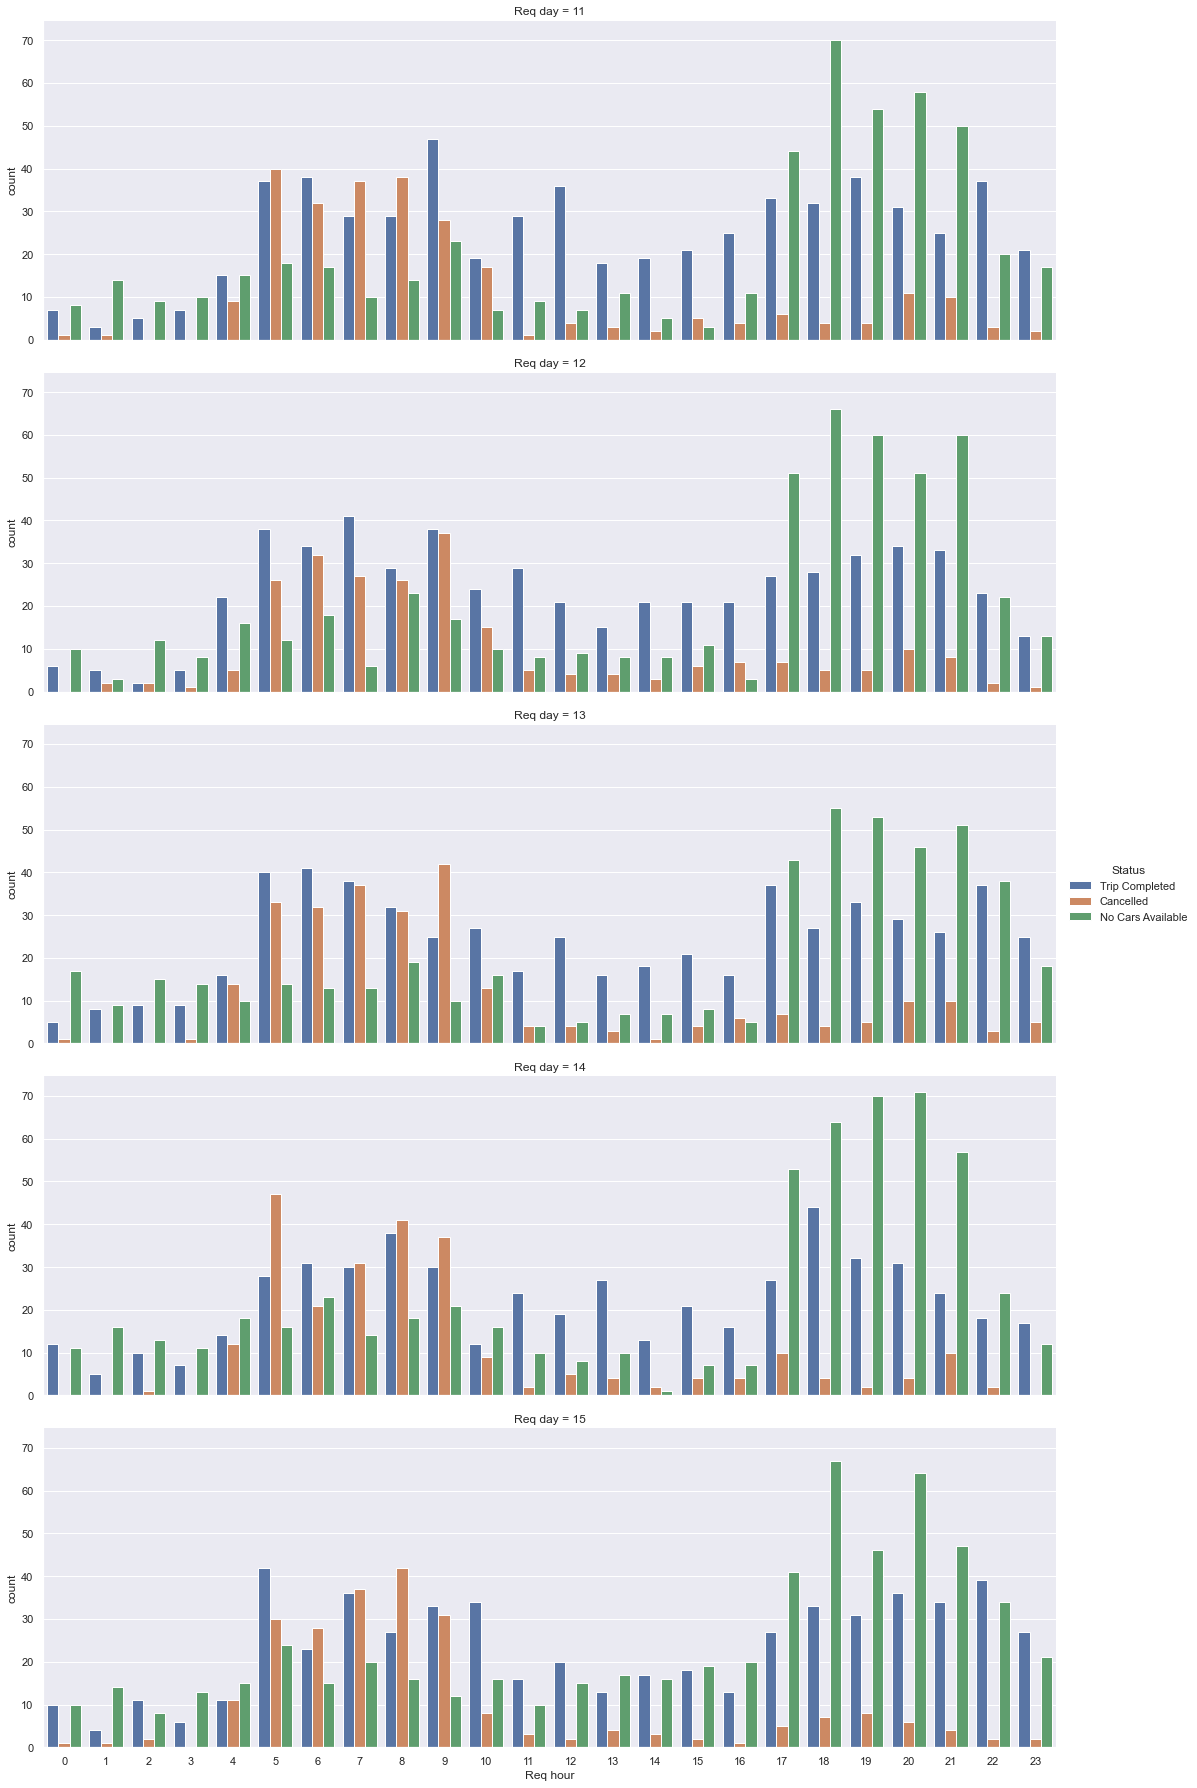

In [15]:
# Factor plot of hour and day with respect to Status

sns.factorplot(x = 'Req hour', hue = 'Status', row = 'Req day', data = uber, kind = 'count', size=5, aspect=3)

Inference:

No Cars available sistuation occurs primarly at evening hours from 5PM to 10 PM.


Frequent Cancellations were encountered in morning hours.



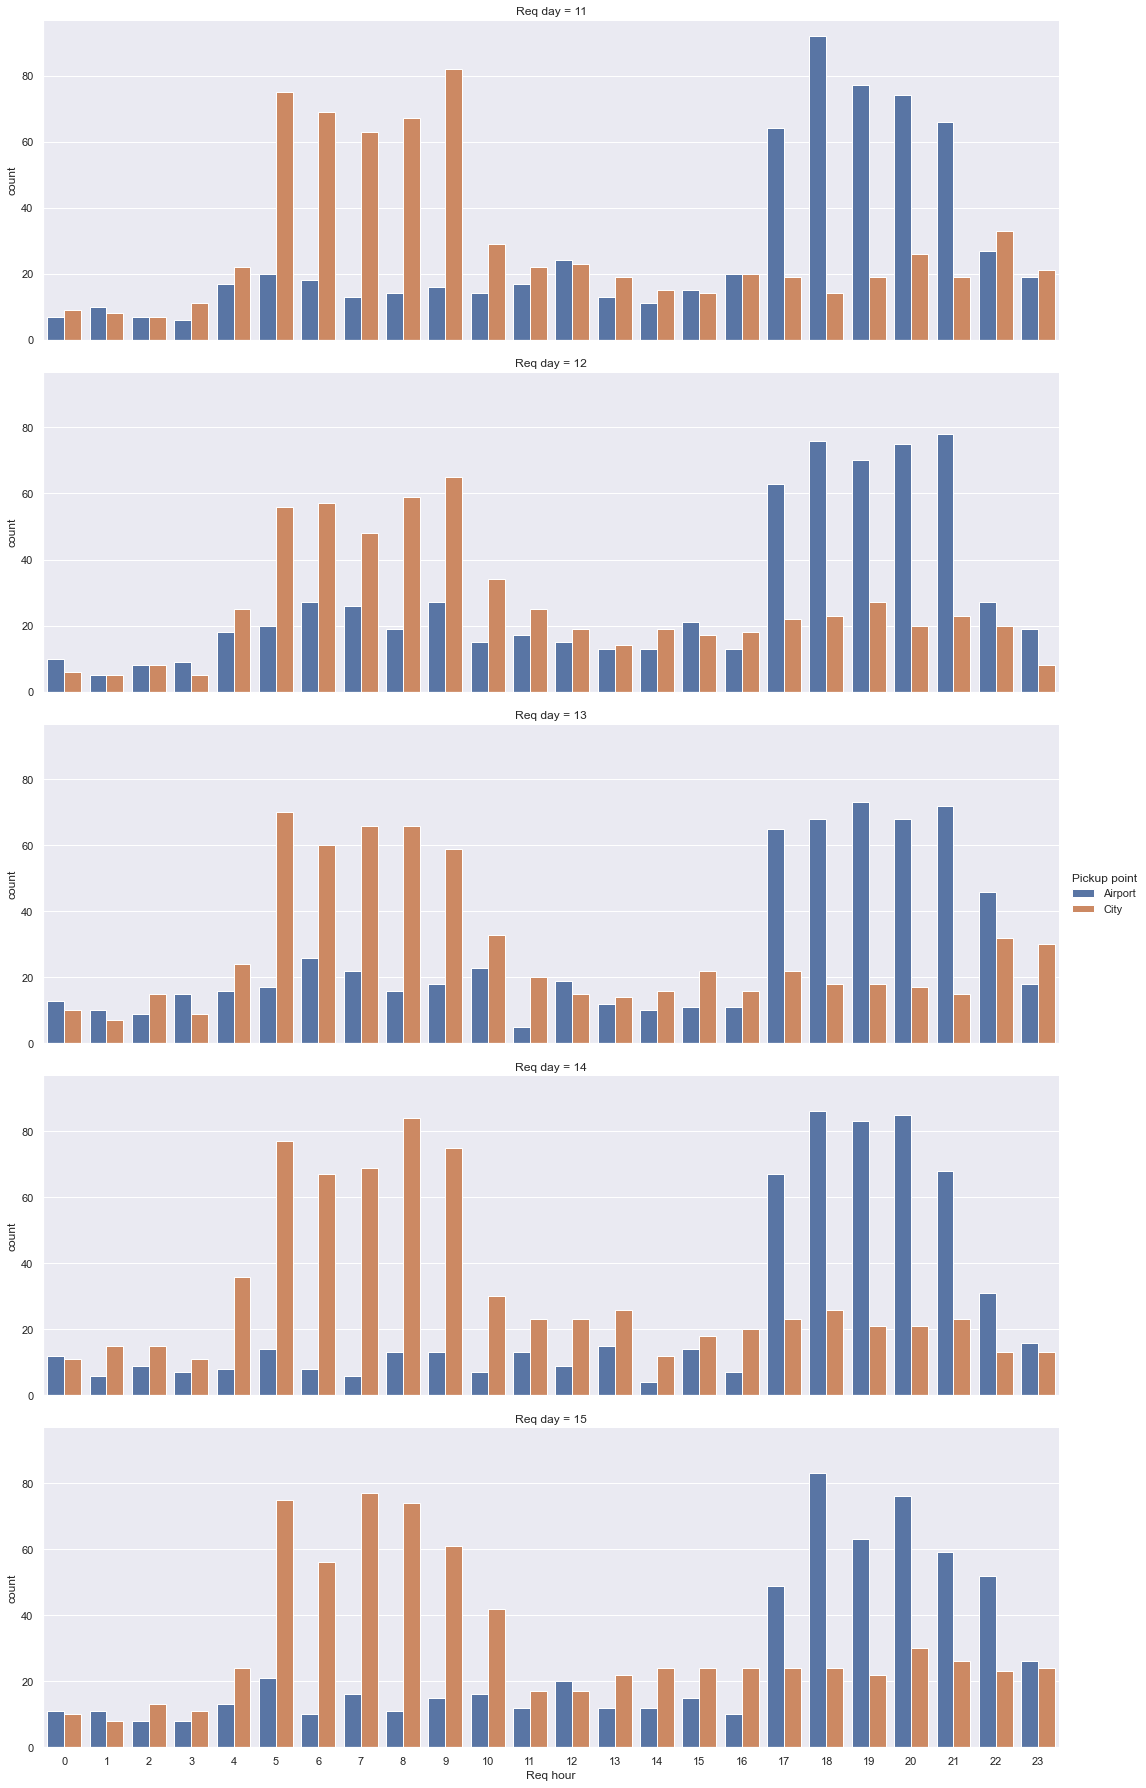

In [16]:
# Factor plot of hour and day with respect to Pickup Point

sns.factorplot(x = 'Req hour', hue = 'Pickup point', row = 'Req day', data = uber, kind = 'count', size=5, aspect=3)

Inference:

Most of the pickups encountered at daytime is from city suggesting more people travel to the airport in day hours.

The pickups from Airport at evening hours are more and it suggests most people land in evening hours.

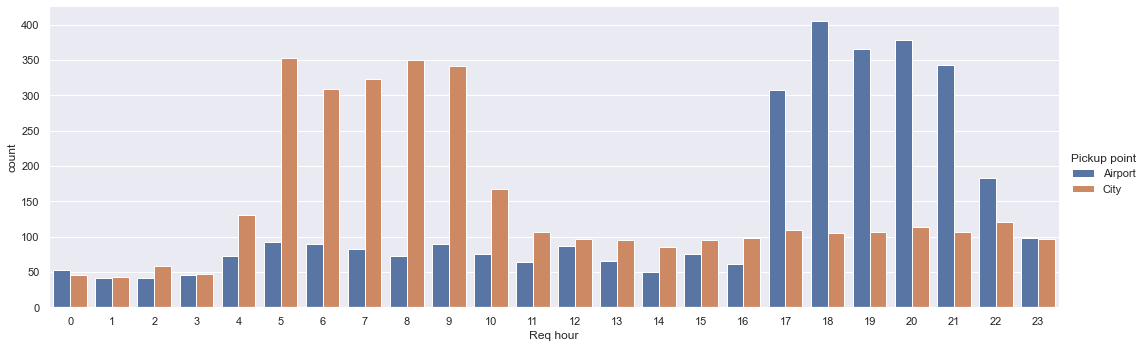

In [17]:
# Aggregate count plot for all days w.r.t. to Pickup point

sns.factorplot(x = 'Req hour', hue = 'Pickup point', data = uber, kind = 'count', size=5, aspect=3)

In [18]:
# Creating timeslots for various time period of the day

time_hour = [0,5,10,17,22,24]
time_slots =['Early Morning','Morning_Rush','Daytime','Evening_Rush','Late_Night']
uber['Time_slot'] = pd.cut(uber['Req hour'], bins = time_hour, labels = time_slots)

Text(0, 0.5, 'Number of occurence ')

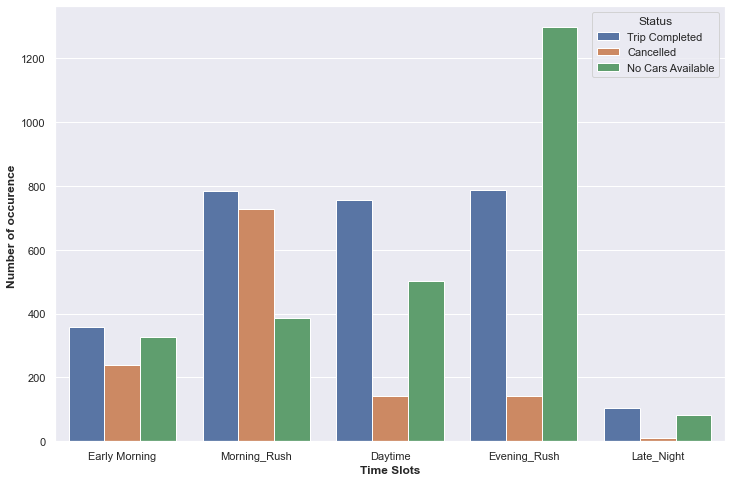

In [19]:
# Visualizing the different time slots wrt status

plt.rcParams['figure.figsize'] = [12,8]
sns.countplot(x = 'Time_slot', hue = 'Status', data = uber)
plt.xlabel("Time Slots",fontweight = 'bold')
plt.ylabel("Number of occurence ",fontweight = 'bold')

Inference:

Cars not available situation arises mostly in evening hours.

Most of the Cancellation happens in morning hours.

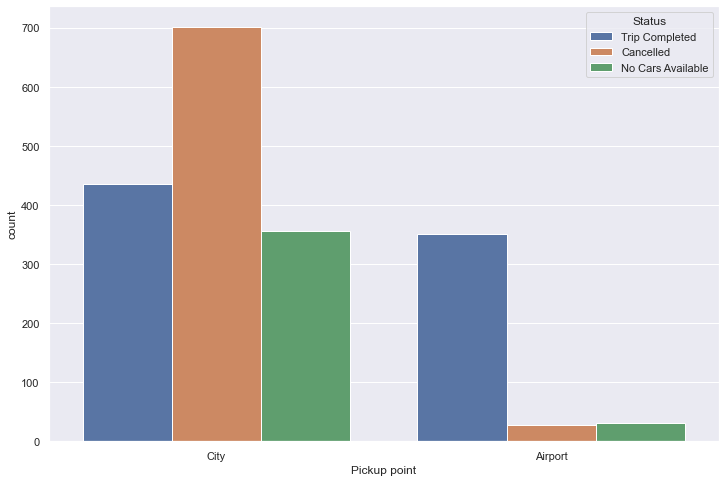

In [20]:
# as we can see in the above plot the higest number of cancellations are in the "Morning Rush" time slot
morning_rush = uber[uber['Time_slot'] == 'Morning_Rush']
sns.countplot(x = 'Pickup point', hue = 'Status', data = morning_rush)

Inference:

The Cancellation situation is a problem for the trip from City to airport in morning hours.



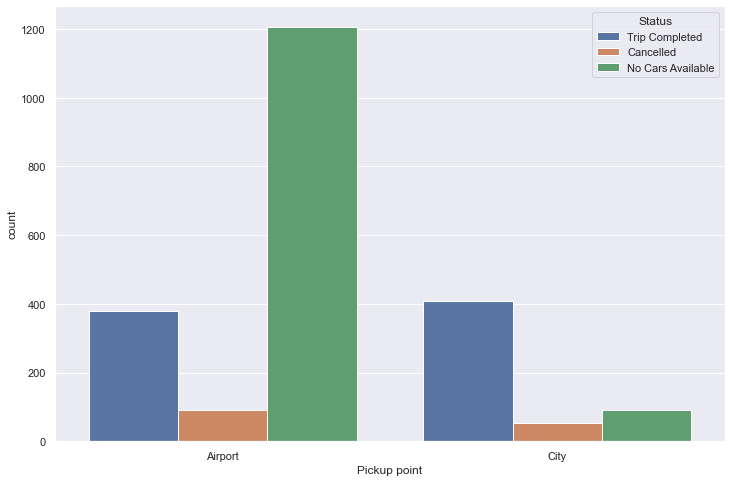

In [21]:
# as we can see in the above plot the higest number of no cars available are in the "Evening Rush" time slot
evening_rush = uber[uber['Time_slot'] == 'Evening_Rush']
sns.countplot(x = 'Pickup point', hue = 'Status', data = evening_rush)

Inference:

The No cars available situation is a problem for the trip from airport to city in evening hours.


In [22]:
# Let's create pie charts instead of a count plots
def pie_chart(dataframe):
    
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

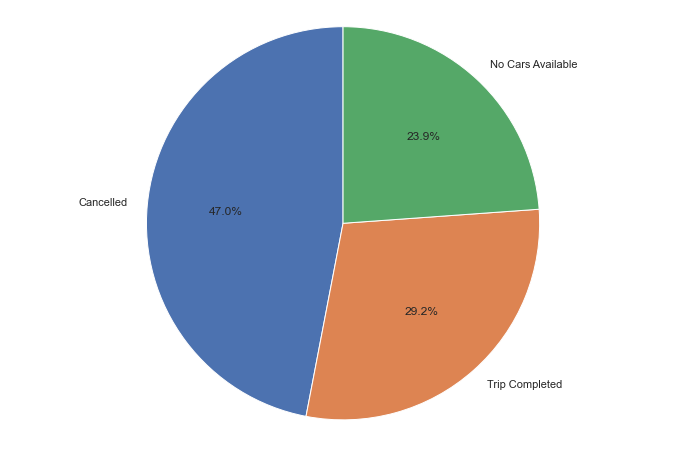

In [23]:
# percentage breakup of status on the basis of pickup location
# Status of trips @ Morning Rush where pickup point is City
city = uber.loc[(uber["Pickup point"] == "City") & (uber.Time_slot == "Morning_Rush")]
city_count = pd.DataFrame(city.Status.value_counts())
pie_chart(city_count)

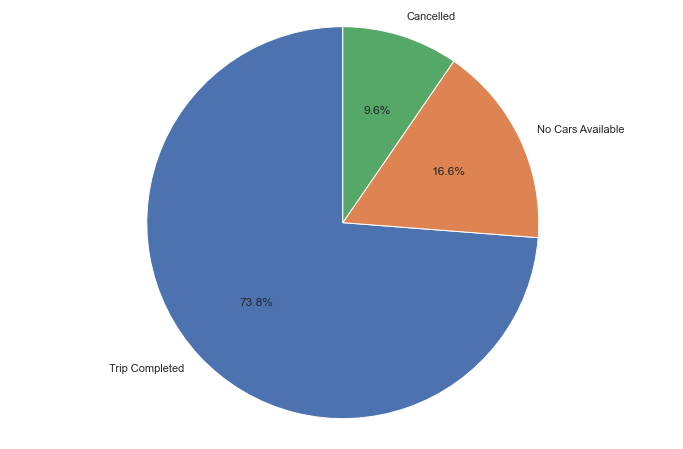

In [24]:
# percentage breakup of status on the basis of pickup location
# Status of trips @ Evening Rush where pickup point is City
city = uber.loc[(uber["Pickup point"] == "City") & (uber.Time_slot == "Evening_Rush")]
city_count = pd.DataFrame(city.Status.value_counts())
pie_chart(city_count)

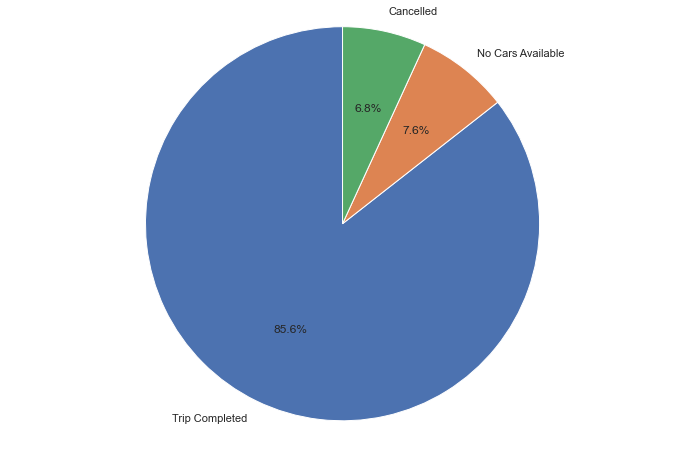

In [25]:
# percentage breakup of status on the basis of pickup location
# Status of trips @ Morning Rush where pickup point is Airport
city = uber.loc[(uber["Pickup point"] == "Airport") & (uber.Time_slot == "Morning_Rush")]
city_count = pd.DataFrame(city.Status.value_counts())
pie_chart(city_count)

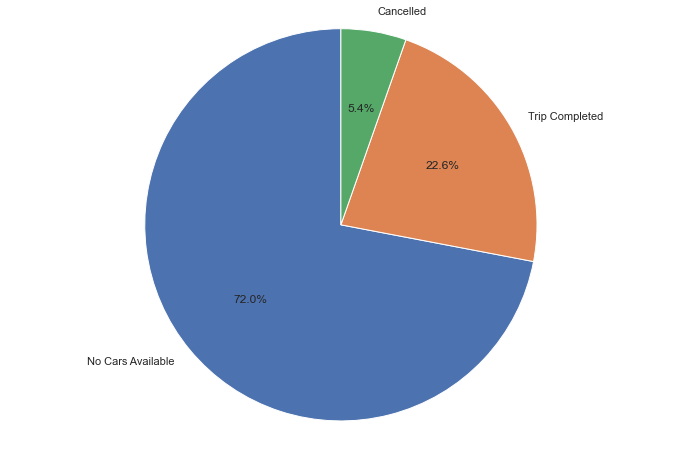

In [26]:
# percentage breakup of status on the basis of pickup location
# Status of trips @ Evening Rush where pickup point is Airport
city = uber.loc[(uber["Pickup point"] == "Airport") & (uber.Time_slot == "Evening_Rush")]
city_count = pd.DataFrame(city.Status.value_counts())
pie_chart(city_count)

We have analyized and drawn various insights of the trips.